In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Folder found: /content/drive/MyDrive/OVARIAN_CANCER_IMAGES/Ovarian_Cancer
Total files: 200
['image_Non_Cancerous_0_31.jpg', '10.JPG', '1.jpg', '9.JPG', '36.JPG', 'b21.JPG', '3.jpg', '18.JPG', 'image_Non_Cancerous_0_9559.jpg', '5.jpg', 'b25.JPG', 'image_Non_Cancerous_0_1429.jpg', 'b29.JPG', '30.JPG', '32.JPG', 'image_Non_Cancerous_0_8367.jpg', 'image_Non_Cancerous_0_8682.jpg', 'image_Non_Cancerous_0_7791.jpg', 'b3.JPG', '27.JPG', 'b12.JPG', '23.JPG', '14.JPG', 'b30.JPG', 'b7.JPG', 'image_Non_Cancerous_0_3391.jpg', 'b16.JPG', 'image_Non_Cancerous_0_3094.jpg', '12.JPG', 'b5.JPG', '7.jpg', '21.JPG', 'image_Non_Cancerous_0_3369.jpg', '16.JPG', 'b18.JPG', '34.JPG', '38.JPG', 'image_Non_Cancerous_0_9381.jpg', 'image_Non_Cancerous_0_7924.jpg', 'b1.JPG', 'b27.JPG', 'image_Non_Cancerous_0_5539.jpg', 'b10.JPG', '29.JPG', 'image_Non_Cancerous_0_3421.jpg', 'image_Non_Cancerous_0_4136.jpg', 'image_Non_Cancerous_0_9966.jpg', 'b23.JPG', 'b9.JPG', '25.JPG', 'b14.JPG', 'image_Non_Cancerous_0_898.jpg', '

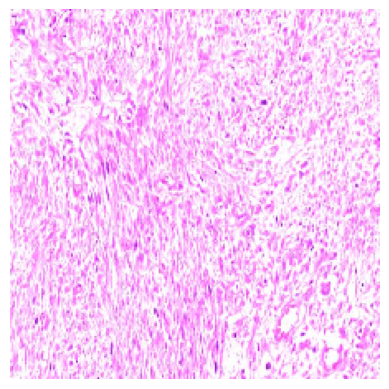

Loaded 101 images.


In [ ]:
import os
image_folder = '/content/drive/MyDrive/Ovarian_Cancer_Images'
# Check if the folder exists and print the files in the folder
if os.path.exists(image_folder):
    print(f"Folder found: {image_folder}")
    files = os.listdir(image_folder)
    print(f"Total files: {len(files)}")
    print(files)  # Optional: To view the list of files in the folder
else:
    print("Folder not found. Please check the path.")

# Step 3: Load and display images (Optional)
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Example to load and display a single image from the folder
img_path = os.path.join(image_folder, files[0])  # Load the first image
img = image.load_img(img_path, target_size=(224, 224))  # Resize if needed
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

# Step 4: Load multiple images and convert to arrays (Optional)
import numpy as np

def load_images_from_drive(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            img_path = os.path.join(folder, filename)
            img = image.load_img(img_path, target_size=(224, 224))  # Adjust size as needed
            img_array = image.img_to_array(img)
            images.append(img_array)
    return np.array(images)

# Load all images from the 'image' folder
images = load_images_from_drive(image_folder)
print(f"Loaded {len(images)} images.")

Total number of augmented images: 3030


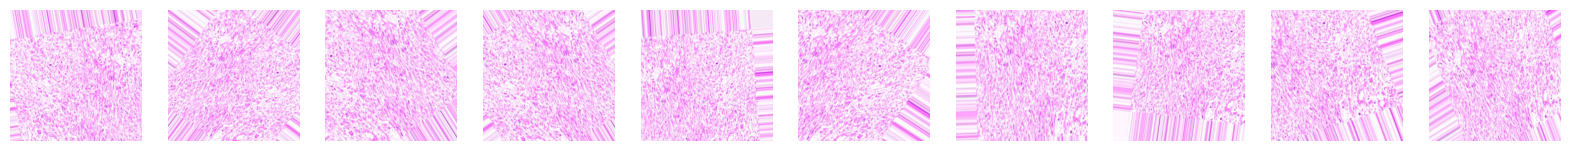

Total number of images (original + augmented): 3131
Total number of labels: 3131


In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Function to load and preprocess images
def load_images_from_directory(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".JPG"):
            img_path = os.path.join(directory, filename)
            img = image.load_img(img_path, target_size=(224, 224))  # Resize images to 224x224 for ResNet50
            img_array = image.img_to_array(img)
            img_array = preprocess_input(img_array)  # Preprocess images as required for EfficientNet
            images.append(img_array)
    return np.array(images)

# Function to augment and visualize images
def augment_and_visualize(images, datagen, num_augmentations=30, visualize_count=10):
    augmented_images = []
    for img in images:
        x = img.reshape((1,) + img.shape)  # Reshape the image array
        i = 0
        for batch in datagen.flow(x, batch_size=1):
            augmented_images.append(batch[0])
            i += 1
            if i >= num_augmentations:
                break

    augmented_images = np.array(augmented_images)
    print(f"Total number of augmented images: {len(augmented_images)}")

    # Visualize some augmented images
    fig, axes = plt.subplots(1, visualize_count, figsize=(20, 20))
    for i in range(visualize_count):
        ax = axes[i]
        ax.imshow(augmented_images[i].astype('uint8'))
        ax.axis('off')
    plt.show()

    return augmented_images
# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply data augmentation and visualize
augmented_images = augment_and_visualize(images, datagen)

# Combine original and augmented images
all_images = np.concatenate((images, augmented_images), axis=0)
print(f"Total number of images (original + augmented): {len(all_images)}")

# Prepare labels (assuming binary classification)
labels = np.array([0] * len(images) + [1] * len(augmented_images))
print(f"Total number of labels: {len(labels)}")

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(all_images, labels, test_size=0.2, random_state=42)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 35s 262ms/step - accuracy: 0.3365 - loss: 1.4854 - val_accuracy: 0.9474 - val_loss: 0.2083
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - accuracy: 0.9172 - loss: 0.2448 - val_accuracy: 0.9601 - val_loss: 0.1498
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.9561 - loss: 0.1618 - val_accuracy: 0.9601 - val_loss: 0.1454
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9631 - loss: 0.1456 - val_accuracy: 0.9601 - val_loss: 0.1430
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.9612 - loss: 0.1496 - val_accuracy: 0.9601 - val_loss: 0.1393
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.9670 - loss: 0.1390 - val_accuracy: 0.9601 - val_loss: 0.1357
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9690 - loss: 0.1201 - val_accuracy: 0.9601 - val_loss: 0.1318
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/s

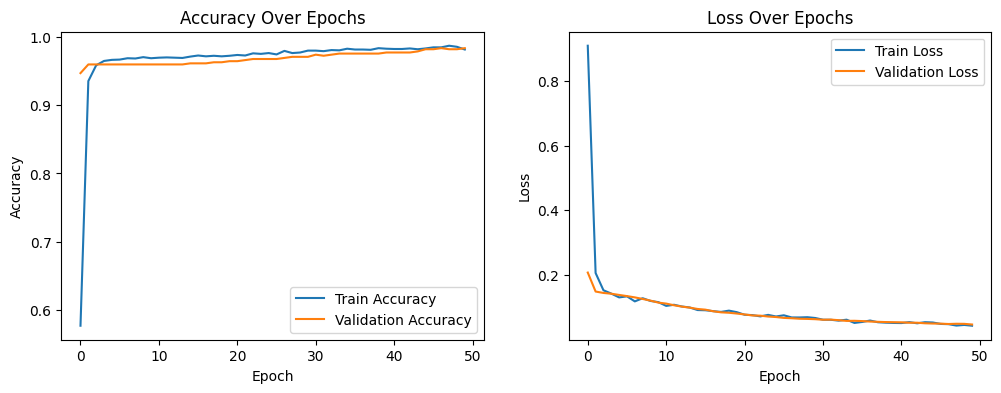

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define the ResNet50 model
def create_resnet50_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Change to 'softmax' and adjust units if multi-class
    ])

    # Freeze base model layers
    base_model.trainable = False
    return model

# Build and compile the model
model = create_resnet50_model()
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation loss: {val_loss}")
print(f"Validation accuracy: {val_accuracy}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 352ms/step

Accuracy: 0.9841
Precision: 0.9837
Recall: 1.0000
F1 Score: 0.9918

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        25
           1       0.98      1.00      0.99       602

    accuracy                           0.98       627
   macro avg       0.99      0.80      0.87       627
weighted avg       0.98      0.98      0.98       627



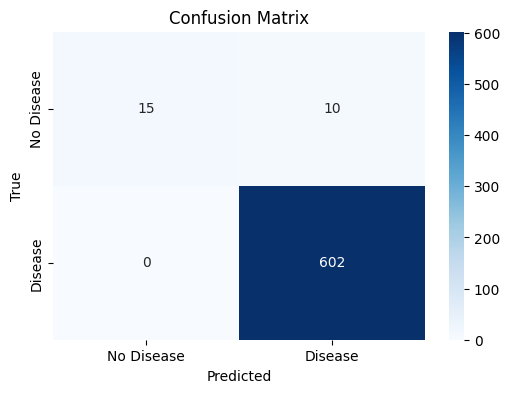

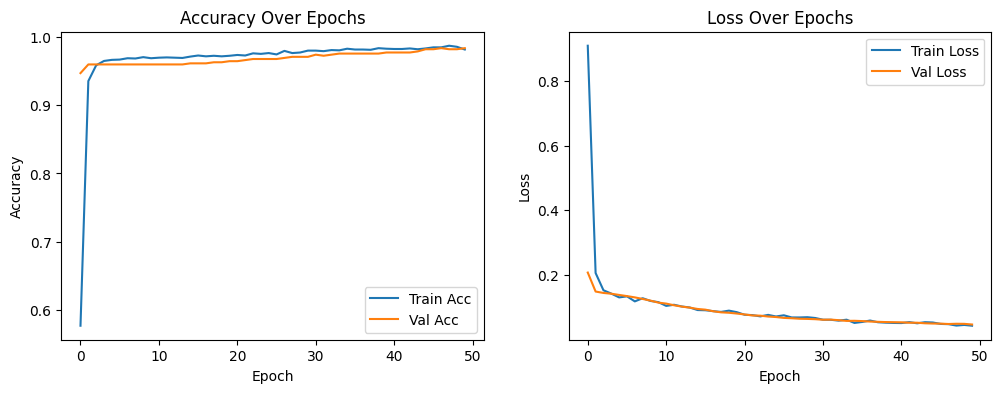

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
# 6. Predict and compute metrics
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"\nAccuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# 7. Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 8. Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input
from tensorflow.keras.models import Model

def create_resnet50_model():
    input_tensor = Input(shape=(224, 224, 3))
    base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    output_tensor = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_tensor, outputs=output_tensor)

    # Freeze base model layers
    base_model.trainable = False
    return model

model = create_resnet50_model()
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

def make_gradcam_heatmap(img_array, model, last_conv_layer_name='conv5_block3_out', pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    grad_model = Model(
        inputs=model.input,
        outputs=[
            model.get_layer(last_conv_layer_name).output,
            model.output
        ]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Compute gradients of the top predicted class for the last conv layer
    grads = tape.gradient(class_channel, conv_outputs)

    # Mean intensity of the gradients for each filter
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each filter output by its gradient importance
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def superimpose_heatmap(heatmap, image, alpha=0.4):
    # Resize heatmap to match image size
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    superimposed_img = heatmap_colored * alpha + image
    return np.uint8(superimposed_img)


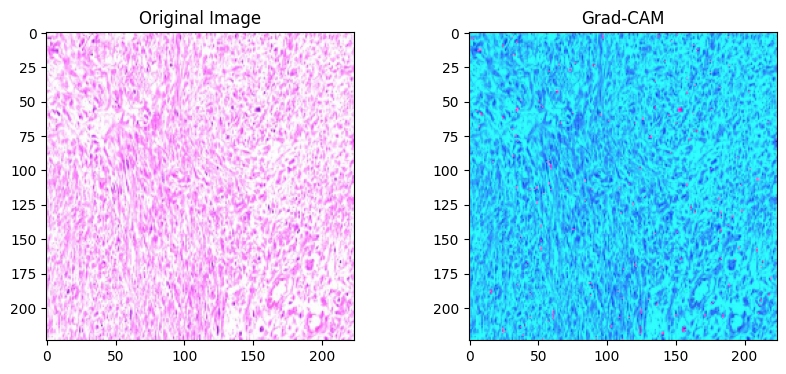

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import os

# Preprocess image
# Replace 'your_image.jpg' with the correct path to your image file
img_path = '/content/drive/MyDrive/OVARIAN_CANCER_IMAGES/Ovarian_Cancer'
# Get a list of image files in the directory
image_files = [f for f in os.listdir(img_path) if os.path.isfile(os.path.join(img_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Select the first image file (you can change the index to select a different image)
image_file = image_files[0]

# Create the full path to the image file
full_img_path = os.path.join(img_path, image_file)

img = cv2.resize(cv2.imread(full_img_path), (224, 224))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_array = np.expand_dims(img_rgb, axis=0)
img_array = preprocess_input(img_array)

# Get Grad-CAM heatmap
heatmap = make_gradcam_heatmap(img_array, model)

# Superimpose heatmap
superimposed_img = superimpose_heatmap(heatmap, img_rgb)

# Show heatmap
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(superimposed_img)
plt.title('Grad-CAM')
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=3d3acb2435c680d95d32e5dbfa85b92a9f139bbe2829a70b759246e23cdfcea7
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━

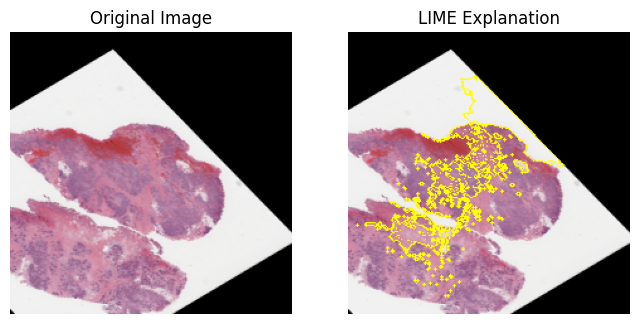

In [ ]:
!pip install lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import numpy as np
import matplotlib.pyplot as plt

# Pick a sample from the validation set
sample_img = X_val[0].astype('double')  # original shape (224, 224, 3)
sample_img_batch = np.expand_dims(sample_img, axis=0)

# Create the LIME explainer
explainer = lime_image.LimeImageExplainer()

# Define a prediction function that works with LIME
def predict_fn(images):
    images = np.array([preprocess_input(img) for img in images])
    return model.predict(images)

# Explain the instance
explanation = explainer.explain_instance(
    sample_img,                # Unnormalized image
    classifier_fn=predict_fn,  # Function that returns prediction probabilities
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

# Get image and mask
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    hide_rest=False
)

# Display
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_img.astype('uint8'))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title("LIME Explanation")
plt.axis('off')

plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step


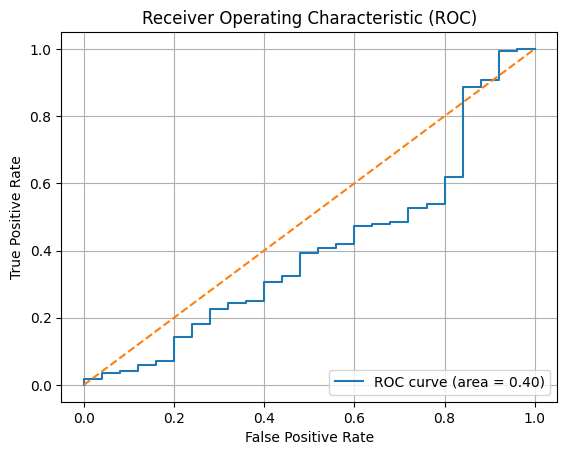

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict(X_val).ravel()
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


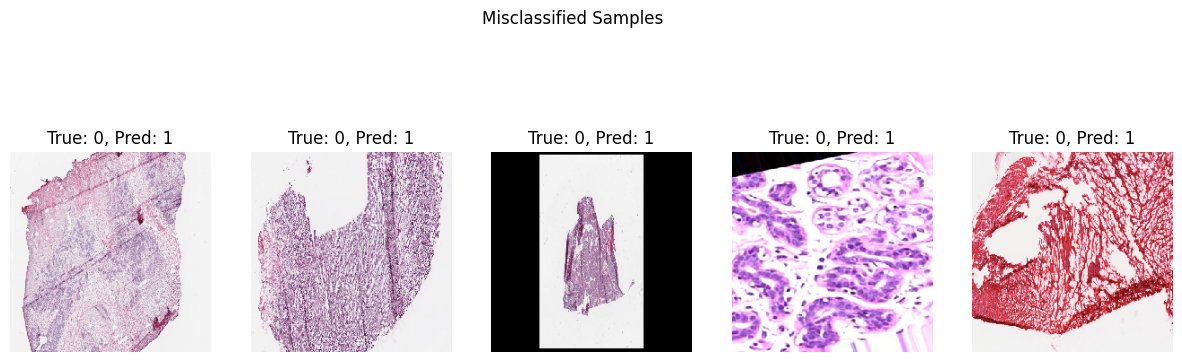

In [ ]:
misclassified_idxs = np.where(y_val != y_pred.flatten())[0]

plt.figure(figsize=(15, 5))
for i, idx in enumerate(misclassified_idxs[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_val[idx].astype('uint8'))
    plt.title(f"True: {y_val[idx]}, Pred: {y_pred[idx][0]}")
    plt.axis('off')
plt.suptitle("Misclassified Samples")
plt.show()
